In [26]:
# here the imports
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd


In [27]:
FIG_SIZE = (10,5) #fixer la taille des figures 

In [28]:
#loading audio files
file = 'nocovid.wav' 
ipd.Audio(file)

In [29]:
# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050) #

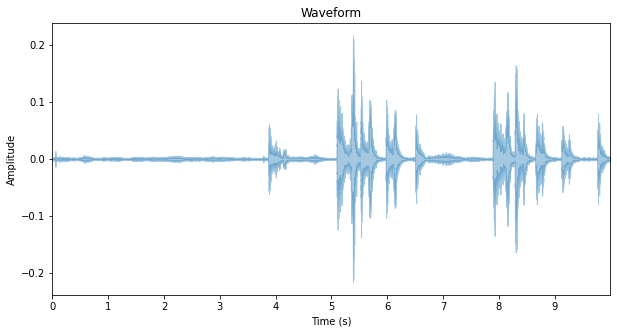

In [30]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.savefig('waveform.png')

In [31]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

In [32]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

In [33]:
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

In [34]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

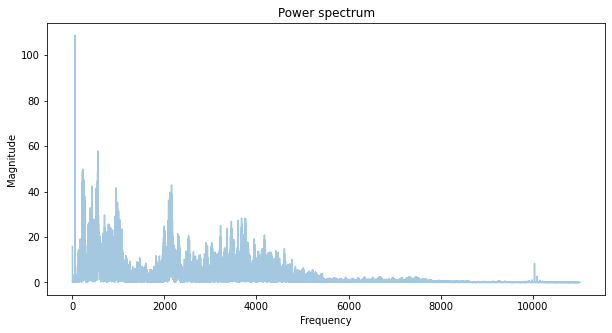

In [35]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.savefig('powerspec.png')

In [36]:
fft[spectrum>39] = 0 #ici j vais filtrer mon specter, en determineant un seuil


c:\users\daran\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


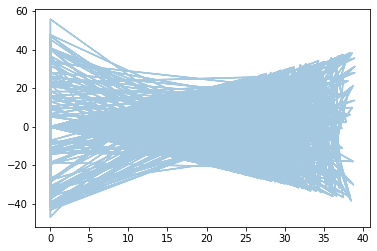

In [37]:
plt.plot(np.abs(fft), np.fft.fft(signal), alpha=0.4)

In [68]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

In [69]:
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

In [70]:
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [71]:
# perform stft (short time fourier transform)
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [72]:
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

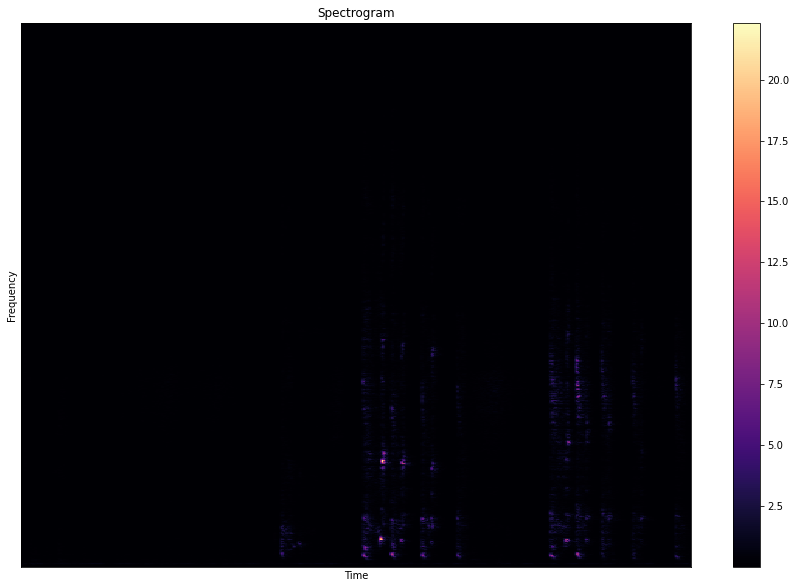

In [73]:
# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.savefig('spectrogram.png')

In [74]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

(1025, 431)


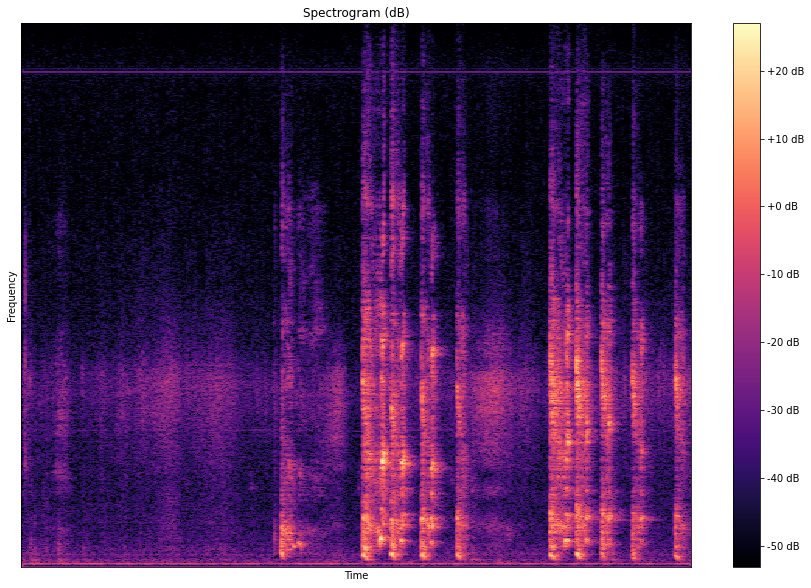

In [75]:
plt.figure(figsize=FIG_SIZE)
print(log_spectrogram.shape)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.savefig('log_spectrogram.png')

In [76]:
# MFCCs
# extract 20 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=20)

In [77]:
for index in range(len(MFCCs)):
    print(index, MFCCs[index].mean())

0 -458.21454
1 66.42321
2 -26.776098
3 47.934284
4 -13.144928
5 -7.023364
6 13.877339
7 -0.3730914
8 5.173618
9 8.433851
10 -5.3954453
11 -1.5802437
12 3.5875437
13 -1.0279998
14 5.0866218
15 3.6502683
16 3.1147437
17 -2.2244802
18 1.8426881
19 2.040787


In [78]:
MFCCs

array([[-552.88837  , -512.53534  , -472.51486  , ..., -452.23883  ,
        -470.02484  , -480.2976   ],
       [  60.128113 ,   38.483795 ,   14.939628 , ...,   87.10401  ,
          83.56671  ,   79.176    ],
       [  -9.1308775,  -17.552303 ,  -32.258095 , ...,  -33.872616 ,
         -25.610779 ,  -25.350975 ],
       ...,
       [   3.7349262,    4.3279004,    2.6221619, ...,    2.884417 ,
           3.3860235,    7.09211  ],
       [   5.034799 ,   -6.0106993,  -11.034786 , ...,    9.646343 ,
           4.9333   ,    6.3550873],
       [  -2.4109778,    2.765504 ,    4.9996424, ...,    1.6640289,
           5.150964 ,    3.878686 ]], dtype=float32)

In [79]:
list_mfcc=[]
list_mfcc.append(MFCCs)
for index in range(len(MFCCs)):
    print (index, MFCCs[index].mean())

0 -458.21454
1 66.42321
2 -26.776098
3 47.934284
4 -13.144928
5 -7.023364
6 13.877339
7 -0.3730914
8 5.173618
9 8.433851
10 -5.3954453
11 -1.5802437
12 3.5875437
13 -1.0279998
14 5.0866218
15 3.6502683
16 3.1147437
17 -2.2244802
18 1.8426881
19 2.040787


In [80]:
#extract chroma_stft:
lst_chroma=[]
chroma = librosa.feature.chroma_stft(signal, sample_rate)
chroma1 = chroma.mean()
lst_chroma.append(chroma1)
chroma

array([[0.48563257, 1.        , 1.        , ..., 0.4043284 , 0.5430156 ,
        0.27695546],
       [0.3237536 , 0.58659494, 0.51518124, ..., 0.37110853, 0.39489615,
        0.21345842],
       [0.43108493, 0.39793578, 0.2528375 , ..., 0.3238488 , 0.33502048,
        0.24094002],
       ...,
       [0.96041244, 0.6863579 , 0.23863584, ..., 0.8864338 , 0.80299926,
        0.87728137],
       [1.        , 0.7289039 , 0.29450348, ..., 1.        , 1.        ,
        1.        ],
       [0.81570494, 0.97612107, 0.63419116, ..., 0.6655755 , 0.81259185,
        0.58257985]], dtype=float32)

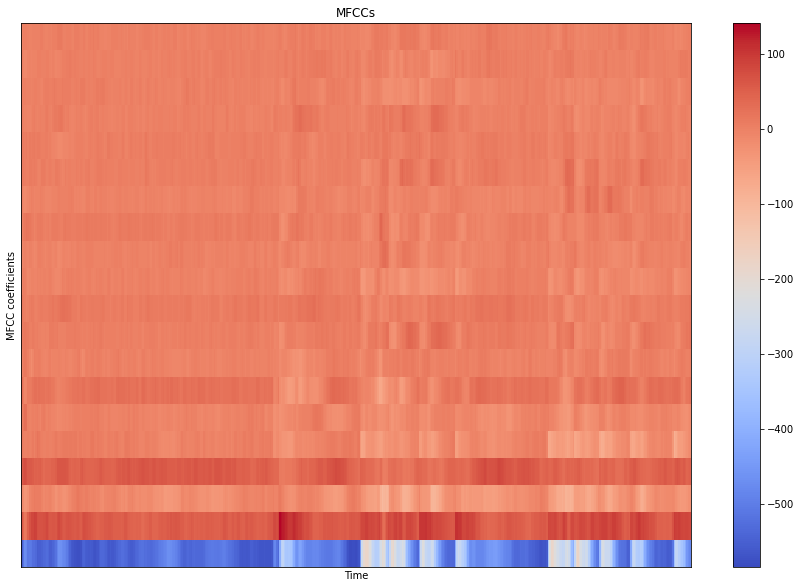

In [81]:
# display MFCCs (visuliaze)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.savefig('MFCC.png')

In [82]:
list = ['1', '2', '3']
list.append(10)
list

['1', '2', '3', 10]

In [83]:
list[3]

10